# Cluster 2: Average Profit and Loss per Study

This cluster is intended to identify the study based on the total profits and losses made by the participating subject.



## Importing Relevant Packages and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from functions import *

In [2]:
index_95 = pd.DataFrame(pd.read_csv('../data/index_95.csv'))
win_95 = pd.DataFrame(pd.read_csv('../data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('../data/lo_95.csv'))

index_100 = pd.DataFrame(pd.read_csv('../data/index_100.csv'))
win_100 = pd.DataFrame(pd.read_csv('../data/wi_100.csv'))
loss_100 = pd.DataFrame(pd.read_csv('../data/lo_100.csv'))

index_150 = pd.DataFrame(pd.read_csv('../data/index_150.csv'))
win_150 = pd.DataFrame(pd.read_csv('../data/wi_150.csv'))
loss_150 = pd.DataFrame(pd.read_csv('../data/lo_150.csv'))

## Creating Separate Datasets per Study

In [3]:
study_fridberg = index_95
study_hortsmann = index_100.iloc[:162]
study_kjome = index_100.iloc[162:181]
study_maia = index_100.iloc[181:221]
study_steingrover_inprep = index_100.iloc[221:291]
study_premkumar = index_100.iloc[291:316]
study_wood = index_100.iloc[316:469]
study_worthy = index_100.iloc[469:]
study_steingrover_2011 = index_150.iloc[:57]
study_wetzels = index_150.iloc[57:]

In [4]:
win_fridberg = win_95
win_hortsmann = win_100.iloc[:162]
win_kjome = win_100.iloc[162:181]
win_maia = win_100.iloc[181:221]
win_steingrover_inprep = win_100.iloc[221:291]
win_premkumar = win_100.iloc[291:316]
win_wood = win_100.iloc[316:469]
win_worthy = win_100.iloc[469:]
win_steingrover_2011 = win_150.iloc[:57]
win_wetzels = win_150.iloc[57:]

In [5]:
loss_fridberg = loss_95
loss_hortsmann = loss_100.iloc[:162]
loss_kjome = loss_100.iloc[162:181]
loss_maia = loss_100.iloc[181:221]
loss_steingrover_inprep = loss_100.iloc[221:291]
loss_premkumar = loss_100.iloc[291:316]
loss_wood = loss_100.iloc[316:469]
loss_worthy = loss_100.iloc[469:]
loss_steingrover_2011 = loss_150.iloc[:57]
loss_wetzels = loss_150.iloc[57:]

These datasets were created manually by checking the structure of each dataset and the studies contained within them.

## Creating Arrays to be Clustered

In [6]:
win_loss_datasets = [[win_fridberg, loss_fridberg],
                    [win_hortsmann, loss_hortsmann],
                    [win_kjome, loss_kjome],
                    [win_maia, loss_maia],
                    [win_steingrover_inprep, loss_steingrover_inprep],
                    [win_premkumar, loss_premkumar],
                    [win_wood, loss_wood],
                    [win_worthy, loss_worthy],
                    [win_steingrover_2011, loss_steingrover_2011],
                    [win_wetzels, loss_wetzels]]

In [7]:
profit_and_loss = []
for dataset_pair in win_loss_datasets:
    profit_and_loss = create_avg_profit_loss_list(dataset_pair, profit_and_loss)

## Plotting the data by Profits and Losses

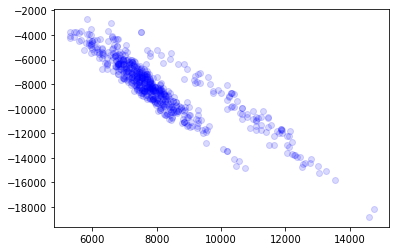

In [8]:
cluster_array = np.array(profit_and_loss)

plt.scatter(
   cluster_array[:, 0], cluster_array[:, 1],
   c='blue', alpha = 0.15
)

## Using Elbow Method to Identify Optimal K for K-Means Algorithm 

In [9]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_array)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\laram\AppData\Local\Continuum\anaconda3\envs\ca4015\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


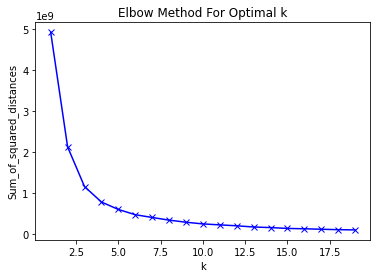

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It appears that the elbow point is at approximately k=5. We will use k=5 in our cluster creation.

## Creating 5 Clusters Using K-Means Algorithm

In [11]:
kmeans_5 = KMeans(
    n_clusters=5, init='random',
    n_init=1, max_iter = 300,
)

y_km_5 = kmeans_5.fit_predict(cluster_array)

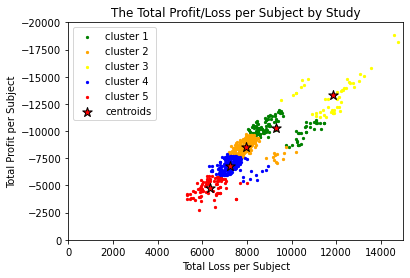

In [12]:
plt.scatter(
    cluster_array[y_km_5 == 0, 0], cluster_array[y_km_5 == 0, 1],
    s=5, c='green',
    marker='o',
    label='cluster 1'
)

plt.scatter(
    cluster_array[y_km_5 == 1, 0], cluster_array[y_km_5 == 1, 1],
    s=5, c='orange',
    marker='o',
    label='cluster 2'
)

plt.scatter(
    cluster_array[y_km_5 == 2, 0], cluster_array[y_km_5 == 2, 1],
    s=5, c='yellow',
    marker='o',
    label='cluster 3'
)

plt.scatter(
    cluster_array[y_km_5 == 3, 0], cluster_array[y_km_5 == 3, 1],
    s=5, c='blue',
    marker='o',
    label='cluster 4'
)

plt.scatter(
    cluster_array[y_km_5 == 4, 0], cluster_array[y_km_5 == 4, 1],
    s=5, c='red',
    marker='o',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1],
    s=100, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("The Total Profit/Loss per Subject by Study")
plt.xlabel("Total Loss per Subject")
plt.ylabel("Total Profit per Subject")
plt.xlim(0,15000)
plt.ylim(0,-20000)
plt.legend(scatterpoints=1)

It is not clear just yet if this is an accurate representation of the data groupings. 
Below we will try out the same clustering technique for k=10, to allow k to equal the same number of classes (studies) that exist.

## Creating a Cluster for each Study using the K-Means Algorithm

In [13]:
kmeans = KMeans(
    n_clusters=10, init='random',
    n_init=1, max_iter = 300,
)

y_km = kmeans.fit_predict(cluster_array)

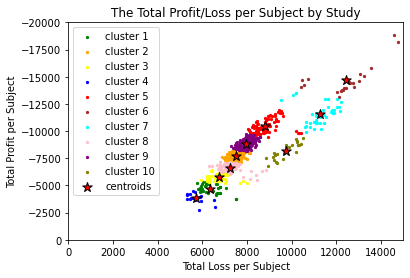

In [14]:
plt.scatter(
    cluster_array[y_km == 0, 0], cluster_array[y_km == 0, 1],
    s=5, c='green',
    marker='o',
    label='cluster 1'
)

plt.scatter(
    cluster_array[y_km == 1, 0], cluster_array[y_km == 1, 1],
    s=5, c='orange',
    marker='o',
    label='cluster 2'
)

plt.scatter(
    cluster_array[y_km == 2, 0], cluster_array[y_km == 2, 1],
    s=5, c='yellow',
    marker='o',
    label='cluster 3'
)

plt.scatter(
    cluster_array[y_km == 3, 0], cluster_array[y_km == 3, 1],
    s=5, c='blue',
    marker='o',
    label='cluster 4'
)

plt.scatter(
    cluster_array[y_km == 4, 0], cluster_array[y_km == 4, 1],
    s=5, c='red',
    marker='o',
    label='cluster 5'
)

plt.scatter(
    cluster_array[y_km == 5, 0], cluster_array[y_km == 5, 1],
    s=5, c='brown',
    marker='o',
    label='cluster 6'
)

plt.scatter(
    cluster_array[y_km == 6, 0], cluster_array[y_km == 6, 1],
    s=5, c='cyan',
    marker='o',
    label='cluster 7'
)

plt.scatter(
    cluster_array[y_km == 7, 0], cluster_array[y_km == 7, 1],
    s=5, c='pink',
    label='cluster 8'
)

plt.scatter(
    cluster_array[y_km == 8, 0], cluster_array[y_km == 8, 1],
    s=5, c='purple',
    label='cluster 9'
)

plt.scatter(
    cluster_array[y_km == 9, 0], cluster_array[y_km == 9, 1],
    s=5, c='olive',
    label='cluster 10'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=100, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("The Total Profit/Loss per Subject by Study")
plt.xlabel("Total Loss per Subject")
plt.ylabel("Total Profit per Subject")
plt.xlim(0,15000)
plt.ylim(0,-20000)
plt.legend(scatterpoints=1)

In the above graph, we can see that the total profit per subject or the total loss per subject is done by their overall totals. This can cause an unintended skew in the data, as the subjects who participated in 150-trial studies will naturally have a better opportunity to earn (or lose) more money.

Below we will see the same graph with the data normalised, instead of total profit and loss for all trials, it will be the average profit or loss that the subject made per trial.

## Creating Data that represents the average profit and loss per choice

In [15]:
avg_profit_and_loss_per_choice = []
for dataset_pair in win_loss_datasets:
    avg_profit_and_loss_per_choice = create_avg_profit_loss__per_choice_list(dataset_pair, avg_profit_and_loss_per_choice)

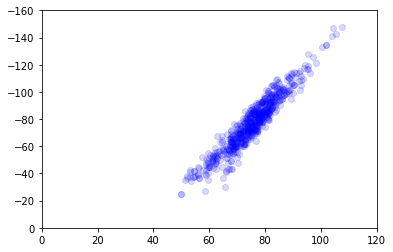

In [16]:
cluster2_array = np.array(avg_profit_and_loss_per_choice)

plt.scatter(
   cluster2_array[:, 0], cluster2_array[:, 1],
   c='blue', alpha = 0.15
)
plt.ylim(0,-160)
plt.xlim(0,120)
plt.show()

In [17]:
kmeans2 = KMeans(
    n_clusters=10, init='random',
    n_init=1, max_iter = 300,
)

y_km2 = kmeans.fit_predict(cluster2_array)

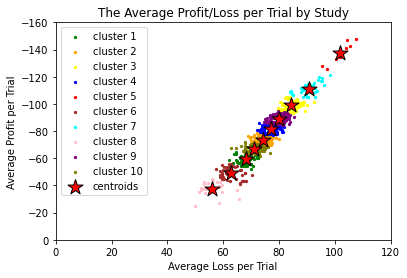

In [18]:
plt.scatter(
    cluster2_array[y_km2 == 0, 0], cluster2_array[y_km2 == 0, 1],
    s=5, c='green',
    marker='o',
    label='cluster 1'
)

plt.scatter(
    cluster2_array[y_km2 == 1, 0], cluster2_array[y_km2 == 1, 1],
    s=5, c='orange',
    marker='o',
    label='cluster 2'
)

plt.scatter(
    cluster2_array[y_km2 == 2, 0], cluster2_array[y_km2 == 2, 1],
    s=5, c='yellow',
    marker='o',
    label='cluster 3'
)

plt.scatter(
    cluster2_array[y_km2 == 3, 0], cluster2_array[y_km2 == 3, 1],
    s=5, c='blue',
    marker='o',
    label='cluster 4'
)

plt.scatter(
    cluster2_array[y_km2 == 4, 0], cluster2_array[y_km2 == 4, 1],
    s=5, c='red',
    marker='o',
    label='cluster 5'
)

plt.scatter(
    cluster2_array[y_km2 == 5, 0], cluster2_array[y_km2 == 5, 1],
    s=5, c='brown',
    marker='o',
    label='cluster 6'
)

plt.scatter(
    cluster2_array[y_km2 == 6, 0], cluster2_array[y_km2 == 6, 1],
    s=5, c='cyan',
    marker='o',
    label='cluster 7'
)

plt.scatter(
    cluster2_array[y_km2 == 7, 0], cluster2_array[y_km2 == 7, 1],
    s=5, c='pink',
    label='cluster 8'
)

plt.scatter(
    cluster2_array[y_km2 == 8, 0], cluster2_array[y_km2 == 8, 1],
    s=5, c='purple',
    label='cluster 9'
)

plt.scatter(
    cluster2_array[y_km2 == 9, 0], cluster2_array[y_km2 == 9, 1],
    s=5, c='olive',
    label='cluster 10'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("The Average Profit/Loss per Trial by Study")
plt.xlabel("Average Loss per Trial")
plt.ylabel("Average Profit per Trial")
plt.xlim(0,120)
plt.ylim(0,-160)
plt.legend(scatterpoints=1)

## Comparing Predicted Clusters to the Original Studies

In [19]:
study_datasets = [study_fridberg, study_hortsmann,
                 study_kjome, study_maia, 
                 study_steingrover_inprep, study_premkumar, 
                 study_wood, study_worthy, 
                 study_steingrover_2011, study_wetzels]

study_list = []
for dataset in study_datasets:
    for study in dataset.iloc[:,1]:
        study_list.append(study)
study_array = np.array(study_list)

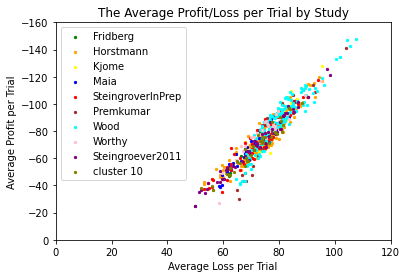

In [20]:
plt.scatter(
    cluster2_array[study_array == 'Fridberg',0], cluster2_array[study_array == 'Fridberg',1],
    s=5, c='green',
    marker='o',
    label='Fridberg'
)

plt.scatter(
    cluster2_array[study_array == 'Horstmann',0], cluster2_array[study_array == 'Horstmann',1],
    s=5, c='orange',
    marker='o',
    label='Horstmann'
)

plt.scatter(
    cluster2_array[study_array == 'Kjome',0], cluster2_array[study_array == 'Kjome',1],
    s=5, c='yellow',
    marker='o',
    label='Kjome'
)

plt.scatter(
    cluster2_array[study_array == 'Maia',0], cluster2_array[study_array == 'Maia',1],
    s=5, c='blue',
    marker='o',
    label='Maia'
)

plt.scatter(
    cluster2_array[study_array == 'SteingroverInPrep',0], cluster2_array[study_array == 'SteingroverInPrep',1],
    s=5, c='red',
    marker='o',
    label='SteingroverInPrep'
)

plt.scatter(
    cluster2_array[study_array == 'Premkumar',0], cluster2_array[study_array == 'Premkumar',1],
    s=5, c='brown',
    marker='o',
    label='Premkumar'
)

plt.scatter(
    cluster2_array[study_array == 'Wood',0], cluster2_array[study_array == 'Wood',1],
    s=5, c='cyan',
    marker='o',
    label='Wood'
)

plt.scatter(
    cluster2_array[study_array == 'Worthy',0], cluster2_array[study_array == 'Worthy',1],
    s=5, c='pink',
    label='Worthy'
)

plt.scatter(
    cluster2_array[study_array == 'Steingroever2011',0], cluster2_array[study_array == 'Steingroever2011',1],
    s=5, c='purple',
    label='Steingroever2011'
)

plt.scatter(
    cluster2_array[study_array == 'Wetzels',0], cluster2_array[study_array == 'Wetzels',1],
    s=5, c='olive',
    label='cluster 10'
)


plt.title("The Average Profit/Loss per Trial by Study")
plt.xlabel("Average Loss per Trial")
plt.ylabel("Average Profit per Trial")
plt.xlim(0,120)
plt.ylim(0,-160)
plt.legend(scatterpoints=1)

The above graph shows no obvious clusters. The choices made by the subjects seem to be generally coherent throughout all of the studies.

This means that the clustering algorithm was limited in it's performance. The k-means clustering algorithm was not the most suitable predictive algortihm to use for this data, as the data is not clustered in its natural form.

This cluster could be expanded more by possibly introducing more features such as the amount of times they chose each deck throughout the trials, this could differentiate the studies and introduce organic clusters as the studies use different payout schemes.

## Real Cluster Assignments
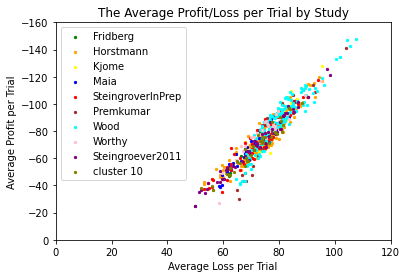

## Predicted Cluster Assignments
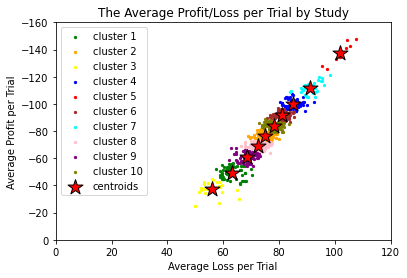